In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceEstimation

## CelebA - Efficientnet

In [5]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_test_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_ef3.csv", True)
df_test_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet.csv", True)
df_test_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg.csv", True)

In [6]:
from performance import PerformanceOptimisation
po_efficientnet = PerformanceOptimisation(df_test_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_test_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_test_vgg, db, "VGG")

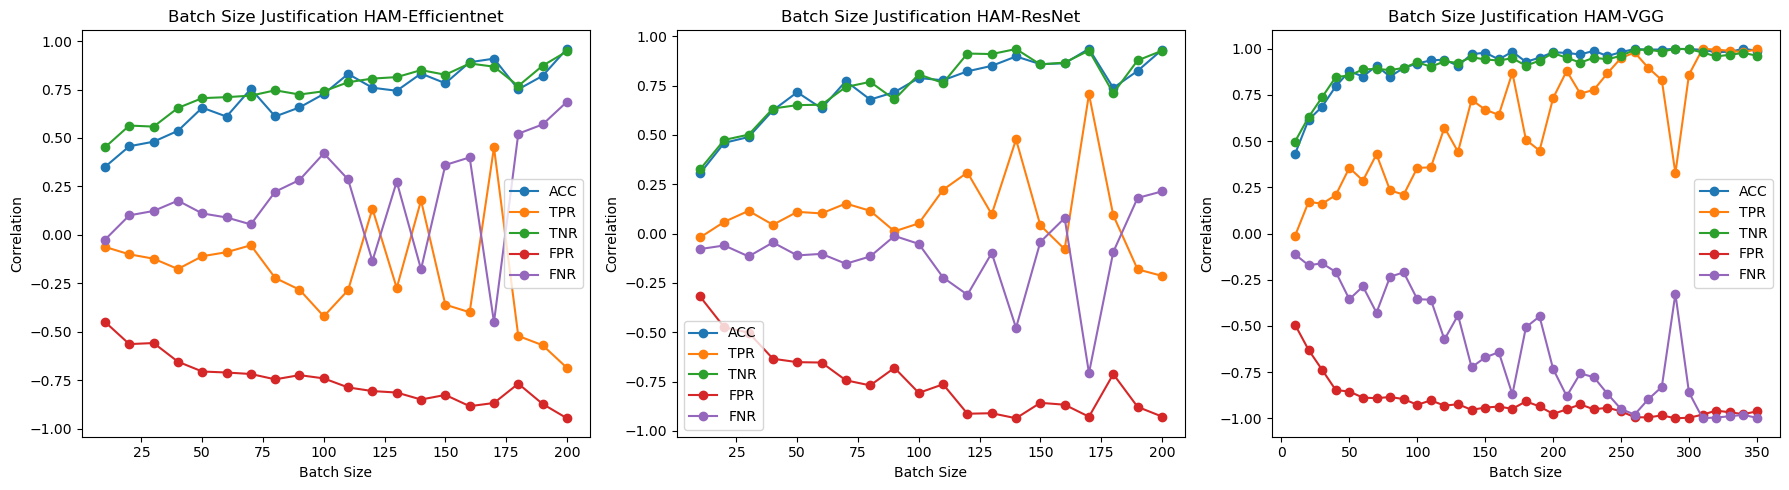

In [7]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [9]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=60)
po_resnet.check_optimal_batch_correlation(batch_size=100)
po_vgg.check_optimal_batch_correlation(batch_size=70)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.610445 -0.089659  0.710842 -0.710842  0.089659
ACC       0.610445  1.000000  0.437204  0.955266 -0.955266 -0.437204
TPR      -0.089659  0.437204  1.000000  0.225726 -0.225726 -1.000000
TNR       0.710842  0.955266  0.225726  1.000000 -1.000000 -0.225726
FPR      -0.710842 -0.955266 -0.225726 -1.000000  1.000000  0.225726
FNR       0.089659 -0.437204 -1.000000 -0.225726  0.225726  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.788500  0.051933  0.807152 -0.807152 -0.051933
ACC       0.788500  1.000000  0.408767  0.941786 -0.941786 -0.408767
TPR       0.051933  0.408767  1.000000  0.127353 -0.127353 -1.000000
TNR       0.807152  0.941786  0.127353  1.000000 -1.000000 -0.127353
FPR      -0.807152 -0.941786 -0.127353 -1.000000  1.000000  0.127353
FNR      -0.051933 -0.408767 -1.000000 -0.127353  0.127353  1.000000
          distance       ACC      

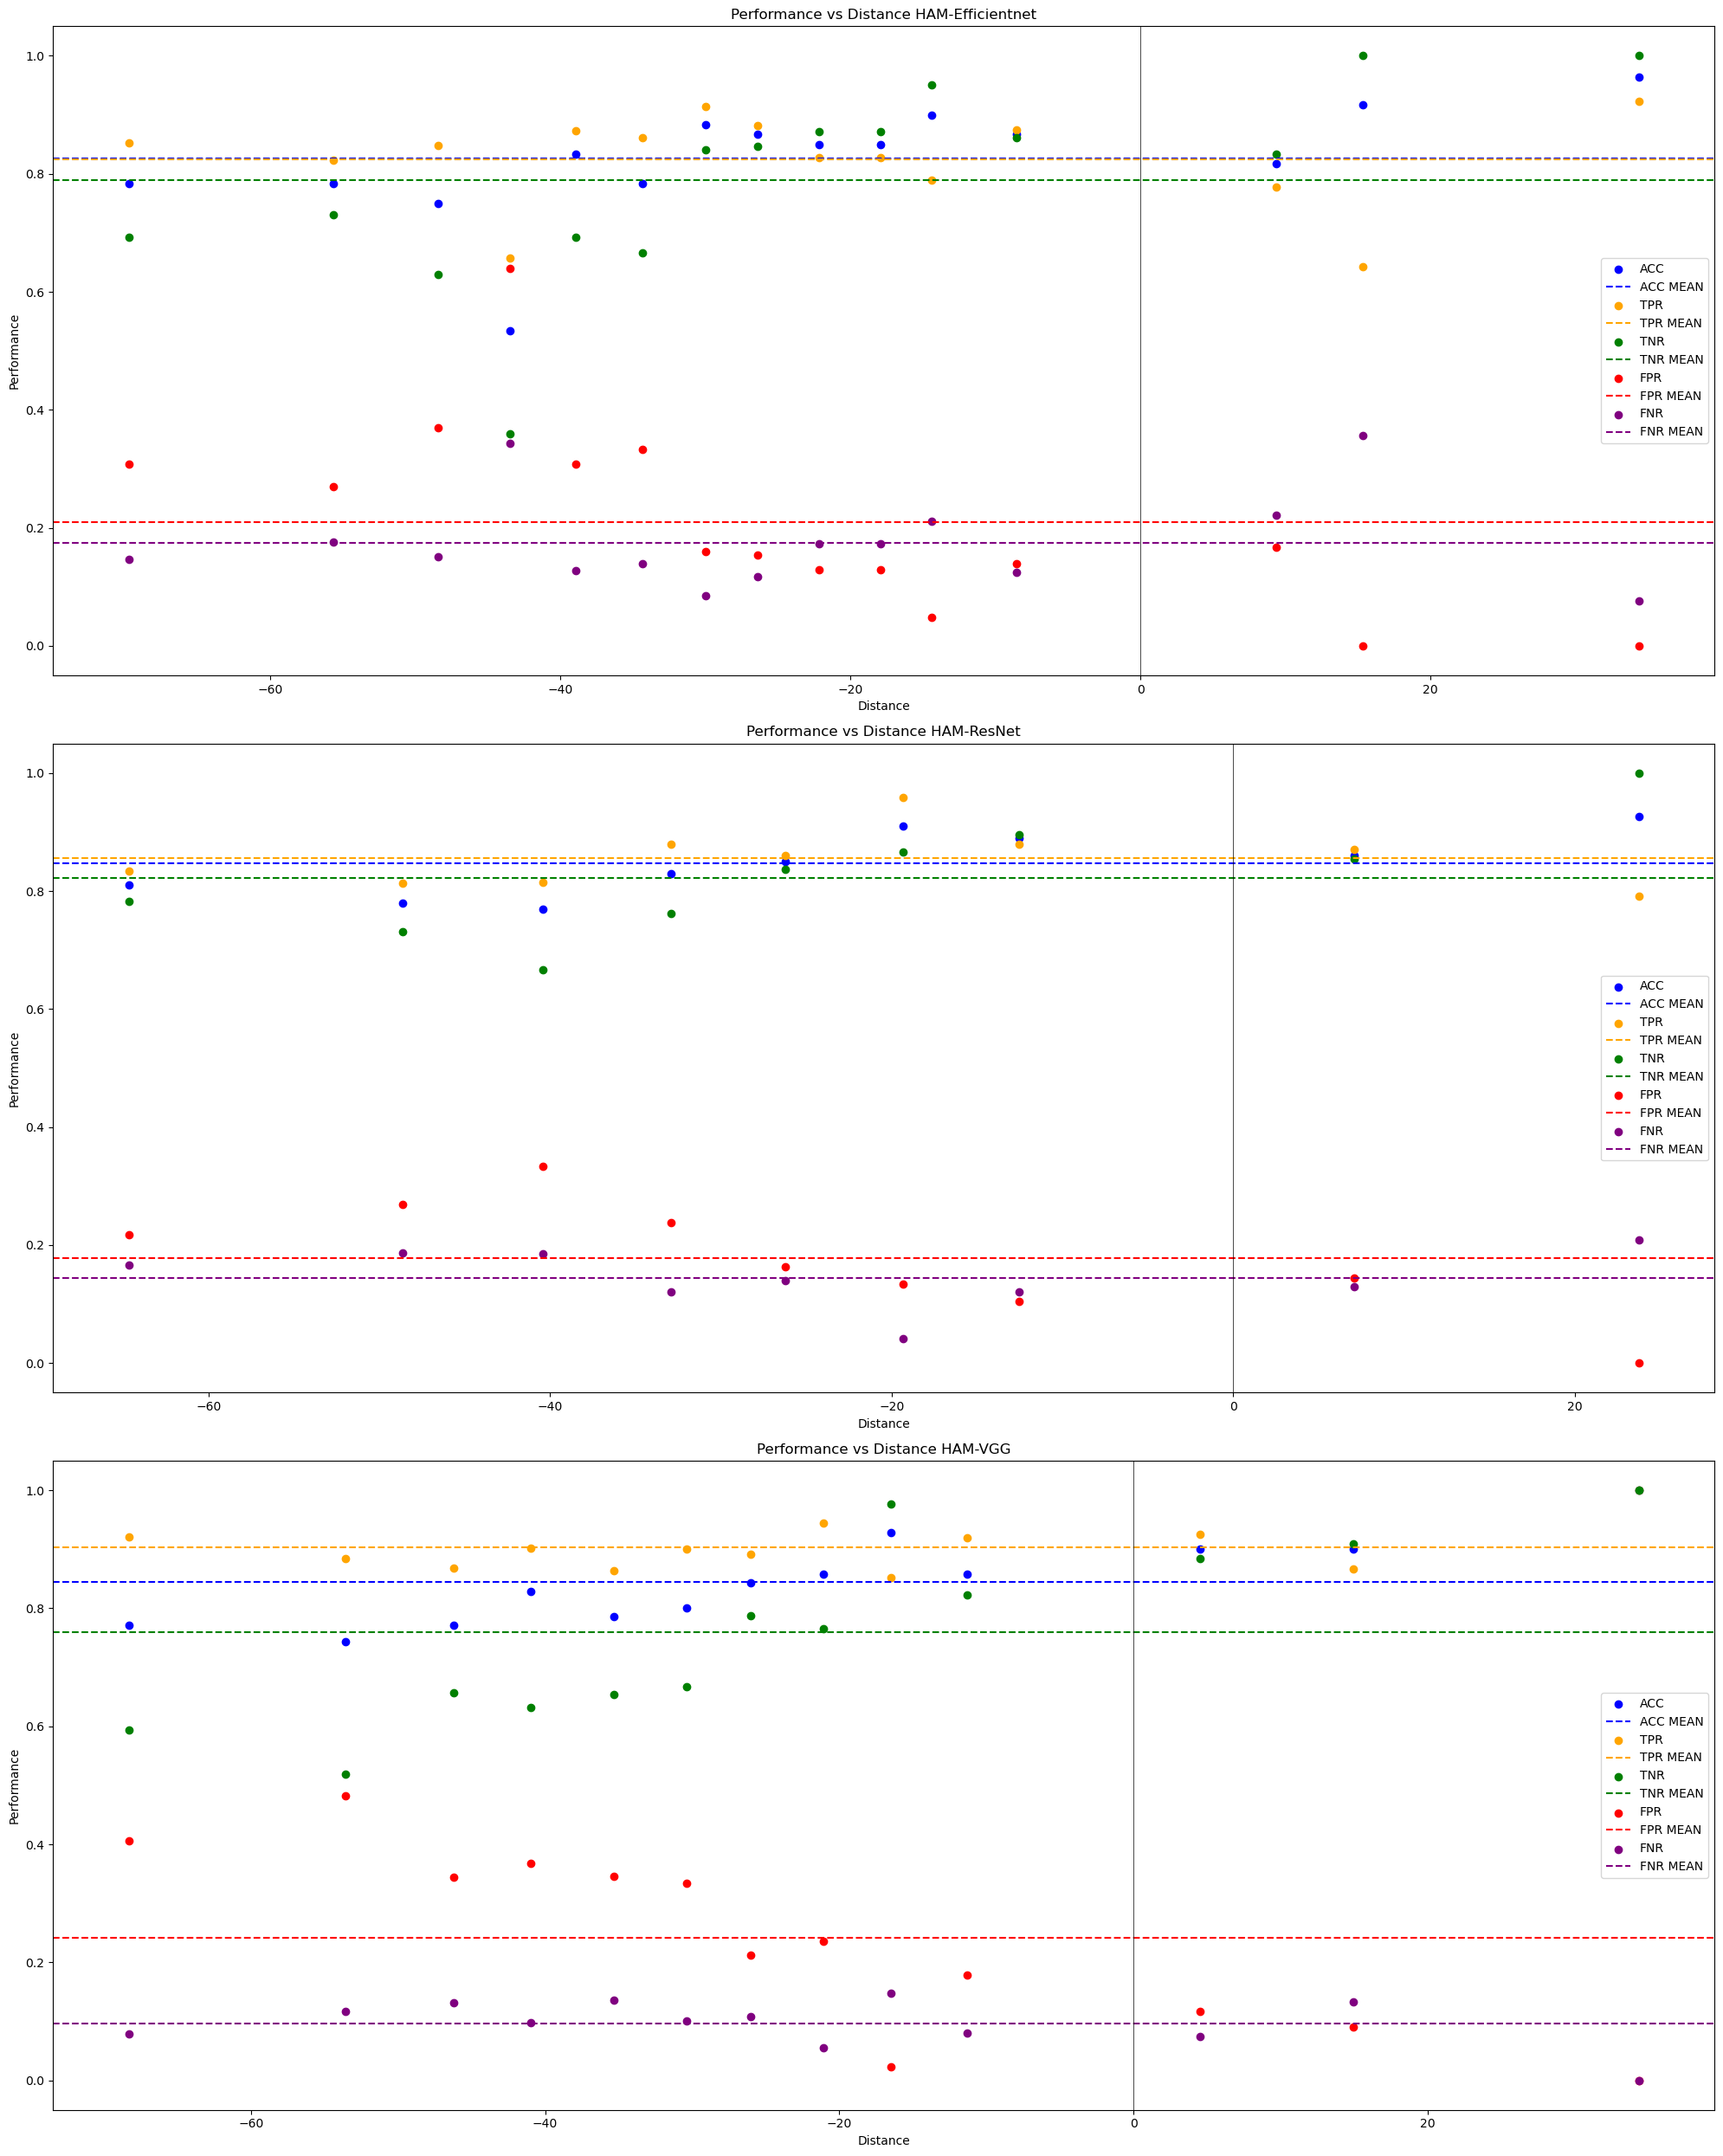

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

HAM - Efficientnet
Degree 1: MSE = 0.012806720885963964
Degree 2: MSE = 0.012802465685908123
Degree 3: MSE = 0.011067404420454273
Degree 4: MSE = 0.00897662840112493
Degree 5: MSE = 0.008734753337964984
HAM - ResNet
Degree 1: MSE = 0.0030103464800242258
Degree 2: MSE = 0.002607502251926851
Degree 3: MSE = 0.0022196527529584407
Degree 4: MSE = 0.0007893732759731302
Degree 5: MSE = 0.00037783070725980585
HAM - VGG
Degree 1: MSE = 0.0044315541122822094
Degree 2: MSE = 0.004285468257956183
Degree 3: MSE = 0.0037432689675020708
Degree 4: MSE = 0.0026079490616474662
Degree 5: MSE = 0.0025752581162320235


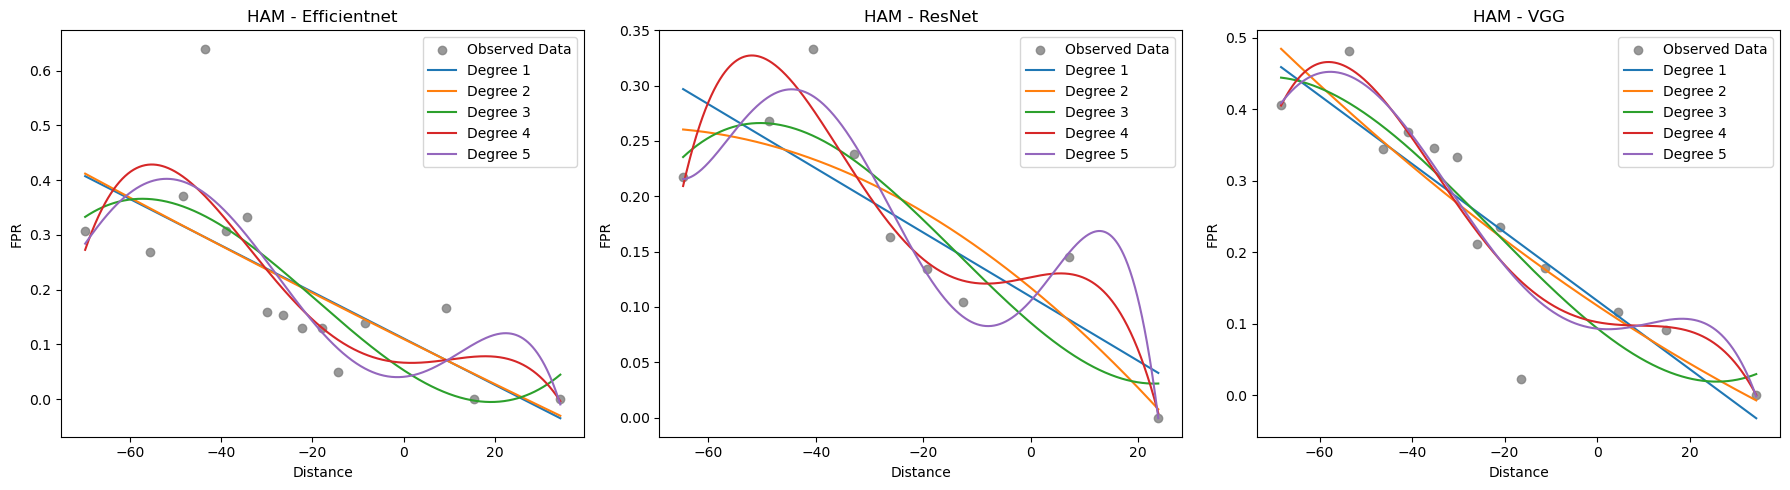

In [11]:
metric = "FPR" # Focus metric for penalty
degrees = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
po_efficientnet.check_optimised_degree(metric, degrees, ax[0])
po_resnet.check_optimised_degree(metric, degrees, ax[1])
po_vgg.check_optimised_degree(metric, degrees, ax[2])

plt.tight_layout()
plt.show()

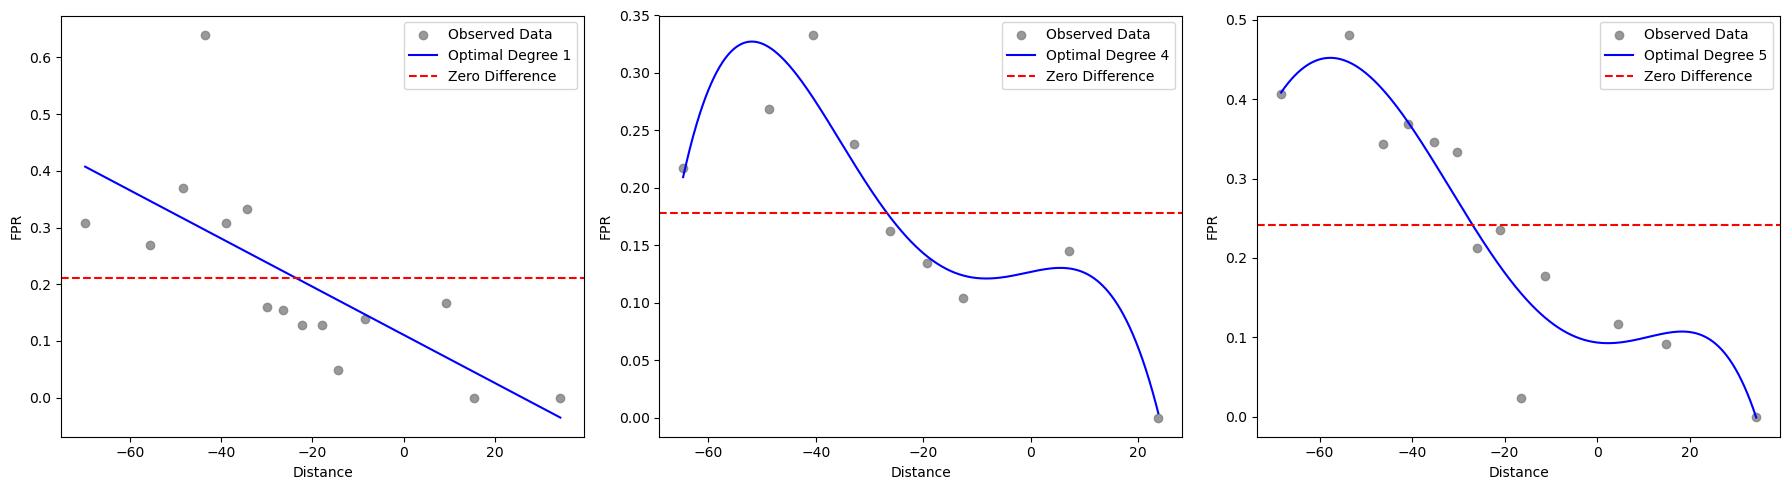

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

optimal_deg = 1
po_efficientnet.diaplay_optimal_degree(metric, optimal_deg, ax[0])

optimal_deg = 4
p = po_resnet.diaplay_optimal_degree(metric, optimal_deg, ax[1])

optimal_deg = 5
po_vgg.diaplay_optimal_degree(metric, optimal_deg, ax[2])

plt.tight_layout()
plt.show()

In [13]:
polynomial_save_file = f"{root}model/pickle/polynomial_model_ef3.pkl"
po_efficientnet.save_optimal_polynomial_model(polynomial_save_file)

polynomial_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
po_resnet.save_optimal_polynomial_model(polynomial_save_file)

polynomial_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"
po_vgg.save_optimal_polynomial_model(polynomial_save_file)

Modle saved
Modle saved
Modle saved
